# Import all Libraries

In [1]:
import numpy as np
import pandas as pd
from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
import time

# Connect to Elastic Search

In [2]:
# create a client instance of the library
es = Elasticsearch(host='localhost', port=9200)

# Function to fetch the Ids and their Respective Messages

In [3]:
start = time.time()
def get_data_from_elastic():
    # query: The elasticsearch query.
    query = {
    
    }
    # Scan function to get all the data. 
    response = scan(client=es,             
               query=query,                                     
               scroll='2m',
               index='filebeat*',
               raise_on_error=True,
               preserve_order=False,
               clear_scroll=True)

    # Keep response in a list.
    result = list(response)
    print("! ",result)
    ids =[]
    for i in range(len(result)):
        ids.append(result[i]["_id"])
    temp = []
    
    # We need only '_source', which has all the fields required.
    for hit in result:
        
        temp.append(hit['_source'])
    # Create a dataframe.
    df = pd.DataFrame(temp)

    return (ids,df)
end = time.time()
print("The time for execution",end-start)

The time for execution 0.0


In [4]:
start = time.time()
lol = get_data_from_elastic()
ids = lol[0]
df = lol[1]
end = time.time()
print("The time for execution",end-start)

C:\Users\amajain\Anaconda3\lib\site-packages\elasticsearch\connection\base.py:208: ElasticsearchWarning: Elasticsearch built-in security features are not enabled. Without authentication, your cluster could be accessible to anyone. See https://www.elastic.co/guide/en/elasticsearch/reference/7.16/security-minimal-setup.html to enable security.
  warnings.warn(message, category=ElasticsearchWarning)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
#Get the message list from the dataFrame for Text Cleaning, Tokenization,etc.
msg_list = list(df['message'])
for i in range(len(msg_list)):
    print(msg_list[i])

Jan 26 12:22:13 combo kernel: audit(1138278092.998:114103): item=0 name=/initrd/XFree86.0.log inode=1021 dev=00:00
Jan 26 12:22:13 combo kernel: NET: Registered protocol family 10
Jan 26 12:22:13 combo kernel: Disabled Privacy Extensions on device 022db720(lo)
Jan 26 12:22:13 combo kernel: IPv6 over IPv4 tunneling driver
Jan 26 12:22:13 combo kernel: audit(1138278093.406:116163): avc:  denied  { name_bind } for  pid=513 exe=/usr/X11R6/bin/Xorg scontext=system_u:system_r:kernel_t tcontext=system_u:object_r:xserver_port_t tclass=tcp_socket
Jan 26 12:22:13 combo kernel: audit(1138278093.406:116163): syscall=102 exit=0 a0=2 a1=fee65200 a2=1770 a3=fee65260 items=0 pid=513 loginuid=-1 uid=0 gid=0 euid=0 suid=0 fsuid=0 egid=0 sgid=0 fsgid=0
Jan 26 12:22:13 combo kernel: audit(1138278093.540:118407): avc:  denied  { write } for  pid=513 exe=/usr/X11R6/bin/Xorg path=/initrd/XFree86.0.log dev= ino=1027 scontext=system_u:system_r:kernel_t tcontext=system_u:object_r:ramfs_t tclass=file
Jan 26 12:2

Nov 29 12:30:27 combo kernel: Out of Memory: Killed process 4371 (httpd).
Nov 29 12:35:21 combo kernel: Out of Memory: Killed process 4372 (httpd).
Nov 29 12:35:29 combo kernel: Out of Memory: Killed process 4373 (httpd).
Nov 29 12:57:02 combo kernel: Out of Memory: Killed process 4374 (httpd).
Nov 29 12:57:10 combo kernel: Out of Memory: Killed process 4375 (httpd).
Nov 29 12:57:15 combo kernel: Out of Memory: Killed process 4382 (httpd).
Nov 29 12:57:28 combo kernel: Out of Memory: Killed process 4383 (httpd).
Nov 29 12:57:39 combo kernel: Out of Memory: Killed process 4751 (httpd).
Nov 29 12:57:43 combo kernel: Out of Memory: Killed process 4604 (httpd).
Nov 29 12:57:50 combo kernel: Out of Memory: Killed process 4605 (httpd).
Nov 29 12:57:58 combo kernel: Out of Memory: Killed process 4606 (httpd).
Nov 29 12:58:04 combo kernel: Out of Memory: Killed process 4607 (httpd).
Nov 29 12:58:15 combo kernel: Out of Memory: Killed process 4608 (httpd).
Nov 29 12:58:36 combo kernel: Out of M

Dec  3 21:56:10 combo kernel: Out of Memory: Killed process 2190 (dbus-daemon-1).
Dec  3 21:56:15 combo kernel: Out of Memory: Killed process 25499 (sendmail).
Dec  3 21:56:20 combo kernel: Out of Memory: Killed process 21792 (sendmail).
Dec  4 02:15:24 combo kernel: Out of Memory: Killed process 27025 (httpd).
Dec  4 02:20:28 combo kernel: Out of Memory: Killed process 27026 (httpd).
Dec  4 02:20:36 combo kernel: Out of Memory: Killed process 27027 (httpd).
Dec  4 02:25:22 combo kernel: Out of Memory: Killed process 27028 (httpd).
Dec  4 02:25:32 combo kernel: Out of Memory: Killed process 27029 (httpd).
Dec  4 02:30:22 combo kernel: Out of Memory: Killed process 27030 (httpd).
Dec  4 02:30:40 combo kernel: Out of Memory: Killed process 27031 (httpd).
Dec  4 02:30:46 combo kernel: Out of Memory: Killed process 27471 (httpd).
Dec  4 02:30:53 combo kernel: Out of Memory: Killed process 27472 (httpd).
Dec  4 02:35:24 combo kernel: Out of Memory: Killed process 27488 (httpd).
Dec  4 02:35

Dec  6 12:23:08 combo kernel: parport0: irq 7 detected
Dec  6 12:23:09 combo kernel: SCSI subsystem initialized
Dec  6 12:23:09 combo kernel: inserting floppy driver for 2.6.5-1.358
Dec  6 12:23:09 combo kernel: Floppy drive(s): fd0 is 1.44M
Dec  6 12:23:09 combo kernel: FDC 0 is a National Semiconductor PC87306
Dec  6 12:23:09 combo kernel: PCI: Found IRQ 5 for device 0000:01:0c.0
Dec  6 12:23:09 combo kernel: 3c59x: Donald Becker and others. www.scyld.com/network/vortex.html
Dec  6 12:23:10 combo kernel: 0000:01:0c.0: 3Com PCI 3c905C Tornado at 0xec80. Vers LK1.1.19
Dec  6 12:23:10 combo kernel: ip_tables: (C) 2000-2002 Netfilter core team
Dec  6 12:23:11 combo kernel: PCI: Found IRQ 5 for device 0000:01:0c.0
Dec  6 12:23:11 combo kernel: 3c59x: Donald Becker and others. www.scyld.com/network/vortex.html
Dec  6 12:23:11 combo kernel: 0000:01:0c.0: 3Com PCI 3c905C Tornado at 0xec80. Vers LK1.1.19
Dec  6 12:23:12 combo kernel: ip_tables: (C) 2000-2002 Netfilter core team
Dec  6 12:23:1

Jan 13 07:06:15 combo ftpd[22039]: connection from 208.49.139.147 () at Fri Jan 13 07:06:15 2006 
Jan 13 07:06:15 combo ftpd[22038]: connection from 208.49.139.147 () at Fri Jan 13 07:06:15 2006 
Jan 13 07:06:15 combo ftpd[22048]: connection from 208.49.139.147 () at Fri Jan 13 07:06:15 2006 
Jan 13 07:06:15 combo ftpd[22042]: connection from 208.49.139.147 () at Fri Jan 13 07:06:15 2006 
Jan 13 07:06:17 combo ftpd[22051]: connection from 208.49.139.147 () at Fri Jan 13 07:06:17 2006 
Jan 13 07:06:17 combo ftpd[22052]: connection from 208.49.139.147 () at Fri Jan 13 07:06:17 2006 
Jan 13 07:06:17 combo ftpd[22053]: connection from 208.49.139.147 () at Fri Jan 13 07:06:17 2006 
Jan 13 07:06:17 combo ftpd[22056]: connection from 208.49.139.147 () at Fri Jan 13 07:06:17 2006 
Jan 13 07:06:17 combo ftpd[22057]: connection from 208.49.139.147 () at Fri Jan 13 07:06:17 2006 
Jan 13 07:06:17 combo ftpd[22054]: connection from 208.49.139.147 () at Fri Jan 13 07:06:17 2006 
Jan 13 07:06:17 comb

Nov 19 11:52:49 combo sshd(pam_unix)[14010]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=pc180-233.nttu.edu.tw  user=root
Nov 19 11:52:49 combo sshd(pam_unix)[14012]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=pc180-233.nttu.edu.tw  user=root
Nov 19 11:52:52 combo sshd(pam_unix)[14014]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=pc180-233.nttu.edu.tw  user=root
Nov 19 11:52:58 combo sshd(pam_unix)[14016]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=pc180-233.nttu.edu.tw  user=root
Nov 19 11:53:00 combo sshd(pam_unix)[14018]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=pc180-233.nttu.edu.tw  user=root
Nov 19 11:53:01 combo sshd(pam_unix)[14020]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=pc180-233.nttu.edu.tw  user=root
Nov 19 11:53:01 combo sshd(pam_unix)[14023]: authentication failure; logname= uid=0 euid=0 tty=NODEV

Nov 22 14:31:09 combo kernel:  [<0212c71b>] filemap_nopage+0x119/0x26d
Nov 22 14:31:09 combo kernel:  [<021361c7>] do_no_page+0xa1/0x235
Nov 22 14:31:09 combo kernel:  [<0213647b>] handle_mm_fault+0x71/0xe2
Nov 22 14:31:09 combo kernel:  [<02114537>] do_page_fault+0x12f/0x446
Nov 22 14:31:09 combo kernel:  [<0213f423>] put_user_size+0x29/0x2d
Nov 22 14:31:09 combo kernel:  [<0227ecc1>] schedule+0x3ed/0x44d
Nov 22 14:31:09 combo kernel:  [<02114408>] do_page_fault+0x0/0x446
Nov 22 14:31:09 combo kernel: 
Nov 22 14:31:10 combo kernel: httpd: page allocation failure. order:0, mode:0xd2
Nov 22 14:31:11 combo kernel: Call Trace:
Nov 22 14:31:13 combo kernel:  [<0212ebf3>] __alloc_pages+0x274/0x281
Nov 22 14:31:14 combo kernel:  [<0213d341>] read_swap_cache_async+0x41/0x84
Nov 22 14:31:15 combo kernel:  [<02135dee>] swapin_readahead+0x2c/0x47
Nov 22 14:31:16 combo kernel:  [<02135e66>] do_swap_page+0x5d/0x1f9
Nov 22 14:31:18 combo kernel:  [<021364a7>] handle_mm_fault+0x9d/0xe2
Nov 22 14:31:

Nov 28 23:27:49 combo kernel: Out of Memory: Killed process 32446 (httpd).
Nov 28 23:28:00 combo kernel: Out of Memory: Killed process 32447 (httpd).
Nov 28 23:28:12 combo kernel: Out of Memory: Killed process 32448 (httpd).
Nov 28 23:28:20 combo kernel: Out of Memory: Killed process 32449 (httpd).
Nov 28 23:28:26 combo kernel: Out of Memory: Killed process 32450 (httpd).
Nov 28 23:28:33 combo kernel: Out of Memory: Killed process 32451 (httpd).
Nov 28 23:28:40 combo kernel: Out of Memory: Killed process 32452 (httpd).
Nov 28 23:45:18 combo kernel: Out of Memory: Killed process 32453 (httpd).
Nov 29 00:00:16 combo kernel: Out of Memory: Killed process 32454 (httpd).
Nov 29 00:00:24 combo kernel: Out of Memory: Killed process 32455 (httpd).
Nov 29 00:10:21 combo kernel: Out of Memory: Killed process 32456 (httpd).
Nov 29 00:10:33 combo kernel: Out of Memory: Killed process 32457 (httpd).
Nov 29 00:10:51 combo kernel: Out of Memory: Killed process 32473 (httpd).
Nov 29 00:15:21 combo ker

Nov 23 13:41:36 combo kernel:  [<0215456f>] inode_update_time+0x8e/0x96
Nov 23 13:41:36 combo kernel:  [<0212cfe2>] generic_file_aio_write_nolock+0x302/0x84e
Nov 23 13:41:36 combo kernel:  [<021c8bda>] vt_console_print+0x64/0x28f
Nov 23 13:41:37 combo last message repeated 2 times
Nov 23 13:41:37 combo kernel:  [<02115f01>] __wake_up+0xe/0x16
Nov 23 13:41:38 combo kernel:  [<021288cf>] __print_symbol+0x110/0x121
Nov 23 13:41:38 combo kernel:  [<0212d602>] generic_file_aio_write+0x69/0x7c
Nov 23 13:41:38 combo kernel:  [<0a8ddb99>] ext3_file_write+0x19/0x88 [ext3]
Nov 23 13:41:38 combo kernel:  [<02141447>] do_sync_write+0x68/0x9d
Nov 23 13:41:39 combo kernel:  [<02115ed2>] __wake_up_common+0x2f/0x50
Nov 23 13:41:40 combo kernel:  [<02115f01>] __wake_up+0xe/0x16
Nov 23 13:41:40 combo kernel:  [<021189cd>] printk+0x106/0x113
Nov 23 13:41:40 combo kernel:  [<021060c2>] show_trace+0x92/0x97
Nov 23 13:41:41 combo kernel:  [<02106159>] dump_stack+0x11/0x13
Nov 23 13:41:41 combo kernel:  [<02

Sep 25 14:07:02 combo sshd(pam_unix)[23230]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25 14:07:02 combo sshd(pam_unix)[23232]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25 14:07:13 combo sshd(pam_unix)[23234]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25 14:07:16 combo sshd(pam_unix)[23236]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25 14:07:16 combo sshd(pam_unix)[23237]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25 14:07:28 combo sshd(pam_unix)[23240]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25 14:07:29 combo sshd(pam_unix)[23242]: authentication failure; logname= uid=0 euid=0 tty=NODEVssh ruser= rhost=219.150.28.34  user=root
Sep 25

Jul  7 16:33:52 combo ftpd[13521]: connection from 202.82.200.188 () at Thu Jul  7 16:33:52 2005 
Jul  7 16:33:52 combo ftpd[13511]: connection from 202.82.200.188 () at Thu Jul  7 16:33:52 2005 
Jul  7 16:33:52 combo ftpd[13516]: connection from 202.82.200.188 () at Thu Jul  7 16:33:52 2005 
Jul  7 16:33:52 combo ftpd[13518]: connection from 202.82.200.188 () at Thu Jul  7 16:33:52 2005 
Jul  7 16:33:52 combo ftpd[13517]: connection from 202.82.200.188 () at Thu Jul  7 16:33:52 2005 
Jul  7 16:33:52 combo ftpd[13519]: connection from 202.82.200.188 () at Thu Jul  7 16:33:52 2005 
Jul  7 23:09:45 combo ftpd[14105]: connection from 221.4.102.93 () at Thu Jul  7 23:09:45 2005 
Jul  7 23:09:45 combo ftpd[14103]: connection from 221.4.102.93 () at Thu Jul  7 23:09:45 2005 
Jul  7 23:09:45 combo ftpd[14104]: connection from 221.4.102.93 () at Thu Jul  7 23:09:45 2005 
Jul  7 23:09:45 combo ftpd[14109]: connection from 221.4.102.93 () at Thu Jul  7 23:09:45 2005 
Jul  7 23:09:45 combo ftpd[1

Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:2, 63.126.79.70#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:3, 63.126.79.71#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:4, 63.126.79.72#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:5, 63.126.79.73#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:6, 63.126.79.75#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:7, 63.126.79.80#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:8, 63.126.79.81#53
Jun 10 15:32:34 combo named[2306]: listening on IPv4 interface eth0:9, 63.126.79.82#53
Jun 10 15:32:35 combo named[2306]: listening on IPv4 interface eth0:10, 63.126.79.83#53
Jun 10 15:32:35 combo named[2306]: listening on IPv4 interface eth0:11, 63.126.79.84#53
Jun 10 11:32:36 combo snmpd: snmpd startup succeeded
Jun 10 15:32:36 combo named[2306]: listening on IPv4 interface eth0:12, 63.

In [7]:
for msg in msg_list:
    #To replace \220 with another value
    msg.replace('\220','>')

# Text Cleaning

In [8]:
start = time.time()
import re
import html

clean_msg_list=[]
for msg in msg_list:
    #Various regular expressions to clean the message data
    #To remove the word combo from the msgs
    msg = re.sub('combo',"",msg)
    #To remove various emailIds
    msg = re.sub(r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$',' ',msg)
    #To remove the hyperlinks
    msg = re.sub(r'https?:\/\/.\S+', " ", msg)
    
    #To remove the date and time from the msgs
    #Format = Time(HH:MM:SS)
    msg = re.sub(r'(\d)?\d:\d\d:\d\d','',msg)
    #Format = Date(Int)(MM/DD/YYYY)/(MM-DD-YYYY)/(MM.DD.YYYY)/(MM DD YYYY)
    msg = re.sub(r'(0?[1-9]|1[012])[- /.](0?[1-9]|[12][0-9]|3[01])[- /.](19|20)?[0-9]{2}( )?$','',msg)
    #Format = Date(Int)(DD/MM/YYYY)/(DD-MM-YYYY)/(DD.MM.YYYY)/(DD MM YYYY)
    msg = re.sub(r'(0?[1-9]|[12][0-9]|3[01])[- /.](0?[1-9]|1[012])[- /.](19|20)?[0-9]{2}( )?$','',msg)
    #Format = Date(Int)(YYYY/MM/DD/)/(YYYY-MM-DD)/(YYYY.MM.DD)/(YYYY MM DD)
    msg = re.sub(r'(19|20)?[0-9]{2}[- /.](0?[1-9]|1[012])[- /.](0?[1-9]|[12][0-9]|3[01])( )?$','',msg)
    #Format = Date(Int) MOnth(Str) Year(Int)
    msg = re.sub(r'(\d)?\d( )? \S\S\S( )?','',msg)
    #Format = Month(Str) Date(Int)
    msg = re.sub(r'\S\S\S( )? (\d)?\d( )?','',msg)
    #Format = Day(Str) Month(Str) Date(Int) Year(YYYY)
    msg = re.sub(r'(\S\S\S )?(\S\S\S )?(\S\S\S)?( )? (\d\d\d\d)?$','',msg)
    #Format = MOnth(Str) Date(Int) Year(Int)
    msg = re.sub(r'\S\S\S( )?[- /.](\d)?\d( )?[- /.](\d\d\d\d)?$','',msg)
    #Format = Date(Int) MOnth(Str) Year(Int)
    msg = re.sub(r'(\d)?\d( )?[- /.]\S\S\S( )?[- /.](\d\d\d\d)?$','',msg)
    #Format = Year(Int) Month(Str) Date(Int)
    msg = re.sub(r'\d\d\d\d( )?[- /.]\S\S\S( )?[- /.](\d)?\d( )?$','',msg)
    
    #To remove IP Addresses
    msg = re.sub(r'((?:(?:25[0-5]|2[0-4]\d|((1\d{2})|([1-9]?\d)))\.){3}(?:25[0-5]|2[0-4]\d|((1\d{2})|([1-9]?\d))))','',msg)
    #To remove any substring of #%abc42 type
    msg = re.sub('\%\w+','',msg) 
    msg = re.sub('\S_\S+','',msg)
    #To remove ... special characters from the msgs
    msg = re.sub('\...+','',msg)
    #To remove � from the msgs
    msg = re.sub(r'\S\�+','',msg)
    #To remove punctuation
    msg = re.sub(r'[^\w\s]','',msg)
    #To remove digits
    msg = re.sub(r'[0-9\n]','',msg)
    #To remove leading and trailing whitespace character
    msg = re.sub(r'^\s*|\s*$','',msg)
    #To remove Blank Lines
    msg = re.sub(r'\n\s*\r ','',msg)
    #To remove any html links
    msg = html.unescape(msg)
    #To remove words of lengths 1 and 2
    msg = re.sub(r'\W*\b\w{1,3}\b','',msg)
    clean_msg_list.append(msg)
end = time.time()
print("The time for execution",end-start)

The time for execution 4.705164432525635


# Tokenization

In [9]:
start = time.time()
#Word tokenization
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize


stop_words = list(set(stopwords.words('english')))
stop_words = stop_words+['uid','eth','euid','PCI','node','Privacy','IRQ','ttyNODEVssh', 'ruser','type', 'ext3', 'uses','others','uhci_hcd','dblo','rhostreliccentrodedatos','sshdpam_unix',' __alloc_pagesxx','ttloop','udev','udevvcs','unix_chkpwd','genfs_contexts','usbdevfs','rhostjwhp5','IPv','tables','Microcode', 'Driver','Hash', 'interface','family','httpd','info', 'mice','check','pass','cache','spamd','bytes','syslog','klogd','BIOS','protocol','NET','at','md','arrays','inontextsystem_usystem_rkernel_t','pidbinsu','filesystem','syscalltfefeaac','pidusrsbincupsd','aamsinuidddidddid','CPU','user', 'cyrus','dev','affffffff','internal', 'service','already','floppy','syslogd','ip_tables','startup','use','NET', 'Registered', 'Revision','CDROM', 'drive','hda']
new_Doc=[]
for msg in clean_msg_list:
    nltk_tokens = nltk.word_tokenize(msg)
    filtered_sentence = []
    for w in nltk_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
    new_Doc.append(filtered_sentence)
end = time.time()
print("The time for execution",end-start)

The time for execution 6.144896984100342


# Stemming

In [10]:
start = time.time()
#from nltk.stem.wordnet import WordNetLemmatizer as wl
from nltk.stem import PorterStemmer
#wordnet = wl()
porter = PorterStemmer()

doc =[]
for docs in new_Doc:
    arr =[]
    for word in docs:
        #arr.append(wordnet.lemmatize(word))
        arr.append(porter.stem(word))
    doc.append(arr)
print(doc)
end = time.time()
print("The time for execution",end-start)

[['kernel', 'audit'], ['kernel'], ['kernel', 'disabl', 'extens', 'devdblo'], ['kernel', 'ipvr', 'ipvnel', 'driver'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['start', 'hpoj', 'succeed'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'audit'], ['kernel', 'univers', 'host', 'control', 'interfac', 'driver'], ['kernel', 'found', 'devf'], ['kernel', 'uhci', 'host', 'control'], ['kernel'], ['kernel', 'selinux', 'initi', 'genf'], ['kernel', 'selinux', 'initi', 'usbf', 

# Re-Formation/DeTokenization

In [11]:
start =time.time()
from sacremoses import MosesDetokenizer

parsed_logs=[]
for words in doc:
    detokens = MosesDetokenizer().detokenize(words, return_str=True)
    parsed_logs.append(detokens)
end = time.time()
print("The time for execution",end-start)

The time for execution 3.5640294551849365


# Story-2

# Count Vectorization

In [12]:
start = time.time()
from sklearn.feature_extraction.text import CountVectorizer
coun_vector = CountVectorizer()
count_matrix = coun_vector.fit_transform(parsed_logs)
count_array = count_matrix.toarray()
#df = pd.DataFrame(data=count_array,columns = coun_vector.get_feature_names())
end = time.time()
print("The time for execution",end-start)

The time for execution 0.3409717082977295


In [13]:
print(coun_vector.vocabulary_)

{'kernel': 258, 'audit': 28, 'disabl': 127, 'extens': 158, 'devdblo': 117, 'ipvr': 245, 'ipvnel': 244, 'driver': 135, 'start': 586, 'hpoj': 206, 'succeed': 595, 'univers': 648, 'host': 205, 'control': 92, 'interfac': 236, 'found': 175, 'devf': 118, 'uhci': 639, 'selinux': 550, 'initi': 224, 'genf': 189, 'usbf': 656, 'regist': 409, 'assign': 25, 'journal': 251, 'devicemapp': 122, 'cdrom': 65, 'open': 333, 'fail': 161, 'addk': 9, 'swap': 602, 'devhda': 119, 'kjournald': 262, 'cup': 101, 'cupsd': 102, 'extf': 160, 'mount': 308, 'order': 337, 'data': 105, 'mode': 305, 'xattr': 675, 'tmpf': 626, 'transit': 631, 'sid': 566, 'sshd': 583, 'xinetd': 679, 'iarocod': 211, 'updat': 654, 'microcod': 304, 'cpueadi': 97, 'revisxrrentx': 423, 'suitabl': 597, 'sendmail': 553, 'parport': 345, 'pcstyle': 351, 'pcspptristateepp': 350, 'ect': 139, 'smclient': 572, 'creat': 98, 'devic': 121, 'udevlp': 636, 'scsi': 542, 'subsystem': 593, 'insert': 232, 'floppi': 171, 'drive': 134, 'nation': 318, 'semiconduct

In [14]:
print(count_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
print(count_array.shape)

(25567, 683)


In [16]:
coun_vector.get_feature_names()

['aabl',
 'abef',
 'abnorm',
 'accept',
 'access',
 'acpi',
 'acpiforc',
 'acpipci',
 'addb',
 'addk',
 'address',
 'aeba',
 'aecc',
 'aeed',
 'afond',
 'agpgart',
 'alert',
 'alloc',
 'allocat',
 'alpag',
 'anacron',
 'anonym',
 'apertur',
 'apmd',
 'architectur',
 'assign',
 'assummhz',
 'atapi',
 'audit',
 'authent',
 'autodetect',
 'autof',
 'automount',
 'autorun',
 'avail',
 'background',
 'batch',
 'bdev',
 'becker',
 'bind',
 'bio',
 'bios',
 'bioseea',
 'biosef',
 'bioseffb',
 'biosprovid',
 'bluetooth',
 'bmdma',
 'board',
 'bridg',
 'bring',
 'broadcast',
 'built',
 'busi',
 'cach',
 'cack',
 'calibr',
 'call',
 'canna',
 'cannaserv',
 'cant',
 'capabl',
 'card',
 'cbda',
 'cddvdrom',
 'cdrom',
 'chan',
 'chang',
 'channel',
 'charact',
 'characxb',
 'charg',
 'chec',
 'check',
 'child',
 'chipset',
 'clea',
 'cleanup',
 'client',
 'clock',
 'close',
 'colour',
 'command',
 'common',
 'complet',
 'compress',
 'comsat',
 'configur',
 'conform',
 'connect',
 'consol',
 'contai

# Tf-Idf Vectorization

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from pyod.models.hbos import HBOS

In [18]:
final_logs = list(set(parsed_logs))
dict1 = {}
for log in range(len(parsed_logs)):
    if dict1.get(parsed_logs[log]) is None:
        dict1[parsed_logs[log]] = []
    dict1[parsed_logs[log]].append(log)
    
# print(len(final_logs))
# print(dict1)

In [19]:
text = final_logs
vectorizer = TfidfVectorizer()
result = vectorizer.fit_transform(text)

In [20]:
t1 = time.time()
text1 = parsed_logs
vec = TfidfVectorizer()
result1 = vec.fit_transform(text1)
print("--- %s seconds ---" % (time.time() - t1))

--- 0.20165491104125977 seconds ---


In [21]:
arr = result.toarray()
print(len(arr))
arr1 = result1.toarray()
print(len(arr1))

530
25567


# Word2Vec

In [22]:
data=pd.read_csv("C:\\Users\\amajain\\Downloads\\nish_intern-main\\prev\\ParsedLogs.csv")
df=data['id,message,@version,@timestamp'].str.split(',',expand=True)
df=df[1]
df=df.to_frame()
messages=df

In [23]:
corpus=set()
for str in df[1]:
    corpus.add(str)

In [24]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)
words=list(words)

In [25]:
words

['',
 'FTP',
 'frequency',
 'ttyS',
 'stratum',
 'colour',
 'driver',
 'Warning',
 'Using',
 'do_page_faultxfx',
 'success',
 'background',
 'rhostmailman',
 'Transport',
 'sys_setuidxddxe',
 'rhostnet',
 'service',
 'IO',
 'Received',
 '__mark_inode_dirtyxxca',
 'Configuration',
 'stream',
 'later',
 'do_page_faultxx',
 'permissive',
 'Maximum',
 'unix_chkpwd',
 'Closing',
 'suitable',
 'rhostno',
 'RAID',
 'xb',
 'rhostarx',
 'system_usystem_rkernel_t',
 'Pentium',
 'initrd',
 'kjournald',
 'runtime',
 'configured',
 'jserver',
 'rhostadsl',
 'EIDE',
 'sort',
 'rhostcsnsu',
 'You',
 'Request',
 'serio',
 'ffb',
 'couldnt',
 'd_instantiatexfx',
 'rhostsrv',
 'blocksize',
 'SCSI',
 'Master',
 'rhostcoldea',
 'rhostrrcs',
 'received',
 'rpc_pipefs',
 'table',
 '__getblkxxb',
 'Subsystem',
 'aec',
 'rhostap',
 'checking',
 'machine',
 'follow_pagexdaxe',
 'cd',
 'LSM',
 'Enabling',
 'Host',
 'authenticate',
 'autorun',
 'test',
 'FROM',
 'dedicated',
 'MB',
 'MHz',
 'chipset',
 'Bluetoot

In [26]:
len(words)

928

# Creating input and label for skip gram

In [27]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE =4 

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [28]:
df = pd.DataFrame(data, columns = ['input', 'label'])
df.shape

(8564, 2)

# Define tensorflow graph

In [29]:
ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)


In [30]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

Instructions for updating:
non-resource variables are not supported in the long term


In [31]:
EMBEDDING_DIM = 8

In [32]:
# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Train the data

In [33]:
import time

st_time=time.time()
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 500
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 25 == 0:
        print('iteration '+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))
end_time=time.time()
print("The time for execution",end_time-st_time)

iteration  loss is :  10.838266
iteration  loss is :  10.376468
iteration  loss is :  10.242721
iteration  loss is :  10.127121
iteration  loss is :  10.025375
iteration  loss is :  9.934559
iteration  loss is :  9.8525505
iteration  loss is :  9.777761
iteration  loss is :  9.708974
iteration  loss is :  9.6452465
iteration  loss is :  9.585828
iteration  loss is :  9.530128
iteration  loss is :  9.477663
iteration  loss is :  9.428031
iteration  loss is :  9.380903
iteration  loss is :  9.336
iteration  loss is :  9.293083
iteration  loss is :  9.251942
iteration  loss is :  9.212399
iteration  loss is :  9.174293
The time for execution 181.15574383735657


In [34]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)

Word Vector Table

In [35]:
vec = pd.DataFrame(vectors)
vec

,0,1,2,3,4,5,6,7
0,1.129790,0.454472,-0.917960,1.554346,1.614659,-0.652061,0.537984,-0.469619
1,1.342759,0.227472,-1.193863,1.204593,-0.918699,0.880607,-0.626353,-0.903316
2,-0.617682,-0.394204,-0.411052,-0.718291,-0.374251,-2.652293,0.825984,-2.080612
3,0.042570,-0.446946,-2.268921,-1.698947,-1.222690,1.847858,1.222802,1.356079
4,-0.660099,0.168061,-0.860025,0.007142,0.240843,0.627353,0.498639,-0.168546
...,...,...,...,...,...,...,...,...
923,-0.132559,-0.178241,-0.364585,-1.014804,-0.872827,-0.024085,1.031031,-0.093301
924,0.792282,-0.946146,-0.518831,2.010284,0.955339,1.540666,-0.354286,-0.872056
925,-0.668635,0.125994,-0.006498,0.393372,0.477484,1.055850,-0.893252,-0.125432
926,-0.393332,0.373677,-1.685682,0.684289,0.000366,0.664079,-0.357598,0.163014


# Calculating mean of vectors

In [36]:
l=len(words)

dict_words={}
for i in range(l):
    dict_words[words[i]]=list(vec.iloc[i,:])

In [37]:
list_final=[]   

sentences=[]
for str in messages[1]:
    sentences.append(str)
for text in sentences:
    temp=text.split(' ')
    lt=[]
    for s in temp:
        lt.append(dict_words[s])
    npat=np.array(lt)
    t=np.mean(npat,axis=0).tolist()
    list_final.append(t)

In [38]:
cl_input=pd.DataFrame(list_final)
cl_input

,0,1,2,3,4,5,6,7
0,0.675217,-0.836329,0.400112,0.048805,0.422785,0.172908,-0.180843,-0.149539
1,-0.003765,-0.124641,-0.129215,-0.020084,-0.034210,-0.024914,-0.012274,0.095981
2,-0.125318,-0.697509,-0.799203,-0.359819,0.177459,0.090875,-0.315683,0.077428
3,0.134784,-0.351420,-0.520501,0.437874,-0.537981,-0.015684,0.089040,-0.465799
4,0.675217,-0.836329,0.400112,0.048805,0.422785,0.172908,-0.180843,-0.149539
...,...,...,...,...,...,...,...,...
25562,-0.003765,-0.124641,-0.129215,-0.020084,-0.034210,-0.024914,-0.012274,0.095981
25563,-0.003765,-0.124641,-0.129215,-0.020084,-0.034210,-0.024914,-0.012274,0.095981
25564,0.046187,0.218289,-0.464329,-0.460336,-1.081825,0.170008,-0.306752,-0.582480
25565,-0.147587,-0.533324,0.357784,0.626924,0.294778,-0.374553,0.216113,0.257184


# DBSCAN

Count Vectorization + DBSCAN + PCA

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [40]:
start = time.time()
# dimensionality Reduction

pca = PCA(n_components=2)

x_principal = pca.fit_transform(count_array)

x_principal = pd.DataFrame(x_principal)

x_principal.columns = ['X1','X2']

print(x_principal)
end = time.time()
print("The time for execution",end-start)

             X1        X2
0      0.029674  0.416376
1      0.029340  0.406181
2      0.029531  0.408422
3      0.029441  0.409108
4      0.029674  0.416376
...         ...       ...
25562  0.029340  0.406181
25563  0.029340  0.406181
25564  0.029382  0.407392
25565  0.029049  0.407563
25566  0.029591  0.407315

[25567 rows x 2 columns]
The time for execution 1.21647047996521


In [41]:
start = time.time()
dbscan = DBSCAN(eps=0.36, min_samples=5).fit(x_principal)

labels = dbscan.labels_
end = time.time()
print("The time for execution",end-start)

The time for execution 3.813349485397339


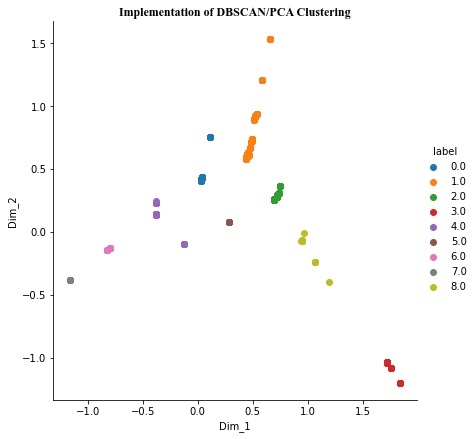

The time for execution 1.0276484489440918


In [42]:
start = time.time()
import seaborn

x_data = np.vstack((x_principal.T, labels)).T

x_data_df = pd.DataFrame(data = x_data, columns = ("Dim_1","Dim_2","label"))

seaborn.FacetGrid(x_data_df, hue ="label", height = 6).map(
       plt.scatter, "Dim_1","Dim_2").add_legend()
plt.title("Implementation of DBSCAN/PCA Clustering", fontname="Times New Roman",fontweight="bold")

plt.show()
end = time.time()
print("The time for execution",end-start)

In [43]:
cluster_no = dbscan.labels_
print(cluster_no)
print(cluster_no.shape)

[0 0 0 ... 0 0 0]
(25567,)


DBSCAN + Tf-Idf vectorization + MDS

In [44]:
copied_arr = arr.copy()
t2 = time.time();

distance_array = pairwise_distances(copied_arr, metric='cosine')

In [45]:
clustering = DBSCAN(eps=0.6, min_samples=3, metric='precomputed').fit(distance_array)
print("--- %s seconds ---" % (time.time() - t2))

val = {
    
    "labels" : list(clustering.labels_),
    "Logs ": final_logs
}
db = pd.DataFrame(val)

--- 0.33387231826782227 seconds ---


In [46]:
cluster = [-2 for x in range(25567)]
for log in range(len(final_logs)):
    for index in dict1[final_logs[log]]:
        cluster[index] = clustering.labels_[log]

In [47]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(copied_arr)

mds = MDS(2)
X_2d = mds.fit_transform(X_scaled)

X_2d
x =[]
y =[]
for arr in X_2d:
    x.append(arr[0])
    y.append(arr[1])


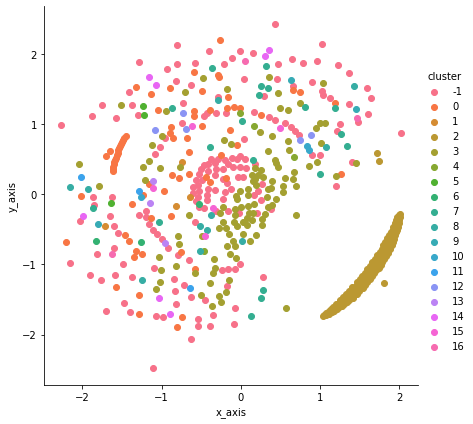

In [48]:
df_plot = pd.DataFrame( {'x_axis': x,
     'y_axis': y,
     'cluster': clustering.labels_
    })

import seaborn
seaborn.FacetGrid(df_plot, hue ="cluster", height = 6).map(
plt.scatter, 'x_axis', 'y_axis').add_legend()

plt.show()

DBSCAN + Word2Vec + T-SNE

In [49]:
data=pd.read_csv(r"C:\Users\amajain\Downloads\nish_intern-main\final\cl_input.csv")

In [50]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
import time
st_time=time.time()
neighbors = NearestNeighbors(n_neighbors=100)
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)
end_time=time.time()
print("The time for Execution:",end_time-st_time)

The time for Execution: 3.7799038887023926


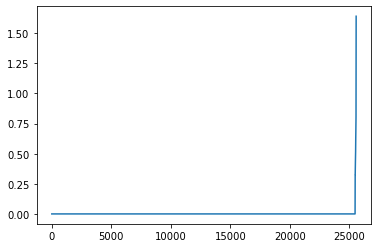

In [51]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [52]:
from sklearn.cluster import DBSCAN

st_time=time.time()
db = DBSCAN(eps=0.02, min_samples=100).fit(data)
labels_nish=db.labels_
sample_cores=np.zeros_like(labels_nish,dtype=bool)
sample_cores[db.core_sample_indices_]=True
end_time=time.time()
print("The time for Execution:",end_time-st_time)

The time for Execution: 4.971304893493652


In [53]:
from sklearn import metrics

print(metrics.silhouette_score(data,labels_nish))
n_clusters=len(set(labels_nish))- (1 if -1 in labels_nish else 0)
n_clusters

0.6840833885958427


21

In [54]:
n_noise_ = list(labels_nish).count(-1)
print("Estimated number of noise points: %d" % n_noise_)

l=list(labels_nish)
cl_labels=[0] *n_clusters

Estimated number of noise points: 5604


In [55]:
for i in range(len(l)):
    if l[i]!=-1:
        cl_labels[l[i]]=cl_labels[l[i]]+1

for i in range(len(cl_labels)):
    print(i,"  ",cl_labels[i])
#cl_labels

0    320
1    162
2    184
3    129
4    131
5    108
6    108
7    2753
8    3357
9    153
10    112
11    117
12    8903
13    1153
14    231
15    231
16    230
17    231
18    231
19    231
20    888


In [56]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

st_time=time.time()
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data)
end_time=time.time()
print("The time for execution: ",end_time-st_time)

The time for execution:  255.31788539886475


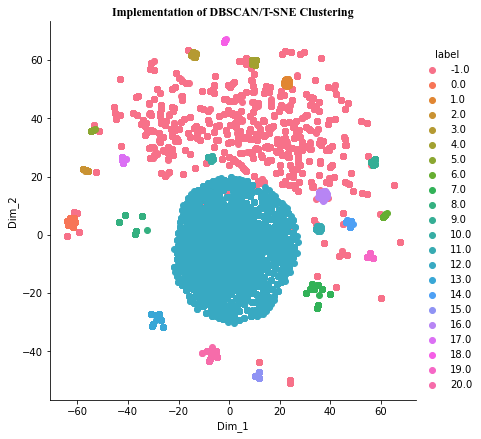

In [57]:
import seaborn
tsne_data1 = np.vstack((tsne_data.T, labels_nish)).T
tsne_df = pd.DataFrame(data = tsne_data1,
     columns =("Dim_1", "Dim_2", "label"))

seaborn.FacetGrid(tsne_df, hue ="label", height = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title("Implementation of DBSCAN/T-SNE Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()

# Anomaly Scoring Techniques

KNN and Isolation Forest by Aman

K-Nearest Neighbours(Proximity Based Outlier detection)- Supervised Learning


In [58]:
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [59]:
start = time.time()
knn = KNN()
knn.fit(count_array)
end = time.time()
print("The time for execution",end-start)

The time for execution 62.91178345680237


In [60]:
print(knn.labels_)

[0 0 0 ... 0 0 0]


In [61]:
anomaly_score = knn.decision_scores_
anomaly_score

array([0., 0., 0., ..., 0., 0., 0.])

In [62]:
knn_threshold = knn.threshold_
print(knn_threshold)

0.0


Aman- Isolation Forest- Unsupervised Learning

In [63]:
start =  time.time()
from pyod.models.iforest import IForest

iforest = IForest()
iforest.fit(count_array)
end = time.time()
print("The time for execution",end-start)

The time for execution 101.39699673652649


In [64]:
ithresh = iforest.threshold_
print(ithresh)

0.0


In [65]:
if_anomaly = iforest.decision_scores_

In [66]:
start = time.time()
dict={'IF_score':if_anomaly,'IF_labels':iforest.labels_}
dataframe = pd.DataFrame(dict)
print(dataframe)
end = time.time()
print("The time for execution",end-start)

       IF_score  IF_labels
0     -0.038522          0
1     -0.046976          0
2     -0.042758          0
3     -0.043916          0
4     -0.038522          0
...         ...        ...
25562 -0.046976          0
25563 -0.046976          0
25564 -0.041077          0
25565 -0.038892          0
25566 -0.046976          0

[25567 rows x 2 columns]
The time for execution 0.00400090217590332


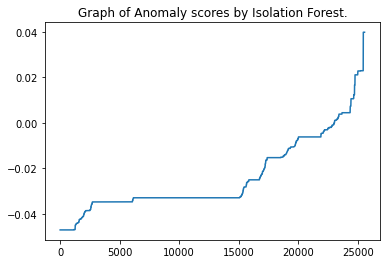

In [67]:
plt.plot(sorted(if_anomaly))
plt.title("Graph of Anomaly scores by Isolation Forest.")
plt.show()

HBOS and Isolation Forest by Ankit

Histogram-based outlier detection (HBOS)

In [68]:
t3 = time.time()
n_bins = 50
hbos = HBOS(alpha=0.5, contamination=0.1, n_bins=n_bins, tol=0.5)
model = hbos.fit(arr1)
y_scores = model.decision_function(arr1)*-1
print("--- %s seconds ---" % (time.time() - t3))

--- 5.933473348617554 seconds ---


Isolation forest

In [69]:
t4 = time.time()
forest = IForest(behaviour="new",contamination=0.1)
forest.fit(arr1)
score_pred = forest.decision_function(arr1)
print("--- %s seconds ---" % (time.time() - t4))

--- 115.44152593612671 seconds ---


In [70]:
score_pred

array([-0.0397269 , -0.04142278, -0.04517665, ..., -0.04453785,
       -0.04392517, -0.03887399])

ECOD by Nishkarsh

In [71]:
from pyod.models.ecod import ECOD

st_time=time.time()
ana_sc=ECOD(contamination=0.22)
ana_sc.fit(data)
end_time=time.time()
print("The time for execution: ",end_time-st_time)

The time for execution:  0.2032155990600586


In [72]:
ecod_score_nparray=ana_sc.decision_scores_
ecod_score=list(ecod_score_nparray)

ecod_lab=ana_sc.labels_
ecod_labels=list(ecod_lab)

ecod_threshold=ana_sc.threshold_
ecod_threshold

13.783757410948331

In [73]:
otl=0
for i in ecod_labels:
    if i==1:
        otl=otl+1

print("The number of Outliers:",otl)

The number of Outliers: 5625


# Scaling

Aman'Work

Sigmoid function

In [74]:
def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig*100

In [77]:
start = time.time()
score_sig = sigmoid(if_anomaly)
end = time.time()
print("The time for execution",end-start)

The time for execution 0.0


In [78]:
print("The threshold of anomaly score from Sigmoid:",sigmoid(ithresh))
print("The maximum of anomaly score from Sigmoid:",np.max(score_sig))
print("The minimum of anomaly score from Sigmoid:",np.min(score_sig))

The threshold of anomaly score from Sigmoid: 50.0
The maximum of anomaly score from Sigmoid: 50.99450032466191
The minimum of anomaly score from Sigmoid: 48.825818331000406


Ankit's Work

MinMax Scaling

In [79]:
list_score1 = list(score_pred)
mi1 = min(list_score1)
ma1 = max(list_score1)
final_score1 = [((x-mi1)/(ma1-mi1))*100 for x in list_score1]

score_pred1 = pd.Series(final_score1)

In [80]:
print("Threshold value by MinMax:",((-forest.threshold_ - mi1)/(ma1-mi1))*100)
print("Min value by MinMax:",min(final_score1))
print("Max value by MinMax:",max(final_score1))

Threshold value by MinMax: 55.41310352674471
Min value by MinMax: 0.0
Max value by MinMax: 100.0


Nishkarsh's Work

Mean Scaling

In [81]:
x=ecod_score
y=(x-np.mean(x))/(max(x)-min(x))
nt=(ecod_threshold-np.mean(x))/(max(x)-min(x))
y=y*100
nt=nt*100
m=min(y)
y=y-m
nt=nt-m

In [82]:
norm_labels=[]
noise=0
for i in y:
    if(i<nt):
        norm_labels.append(0)
    else:
        norm_labels.append(1)
        noise=noise+1

noise

5625

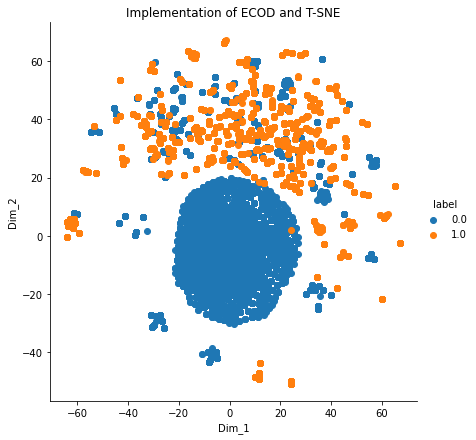

In [83]:
tsne_data2 = np.vstack((tsne_data.T, ecod_labels)).T
tsne_df = pd.DataFrame(data = tsne_data2,
     columns =("Dim_1", "Dim_2", "label"))
seaborn.FacetGrid(tsne_df, hue ="label", height = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('Implementation of ECOD and T-SNE')
plt.show()

In [84]:
dict={'Anomaly score':y,'Cluster labels':labels_nish}

In [85]:
nish_result=pd.DataFrame(dict)
nish_result.head()

,Anomaly score,Cluster labels
0,33.212301,0
1,17.342813,1
2,21.872133,-1
3,67.299796,-1
4,33.212301,0


# Update the Index

In [86]:
ids[0]

'3y51c38BQ2yDyGVTnYjI'

start = time.time()

for i in range(len(ids)):
    try:
        # call the Update method
        update_response = es.update(
        index='filebeat-7.16.3-2022.03.10',
        doc_type="_doc",
        id=ids[i],
        body={"doc" : { 
        "score" :score_sig[i] ,
        "cluster" : cluster_no[i]
        }
             }
        )

        # print the response to screen
        print (update_response, '\n\n')
        
    except Exception as err:
        print ('Elasticsearch Update API error:', err)
end = time.time()
print("The time for execution:",end-start)